### Imports and Setup 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [12]:
data = pd.read_csv('data/clean_data.csv')

data.head(5)

,id,age,monthly_income,collateral_value,loan_amount,state,collateral_debt,verified_restriction,dishonored_checks,expired_debts,...,pre_approved,form_completed,sent_to_analysis,channel,zip_code,landing_page,landing_page_product,gender,utm_term,education_level
0,173460,52,5668.0,24000.0,5000.0,SP,900.0,0.0,0,0,...,1,0,0,search,4028XXXX,/emprestimos/solicitar,PersonalLoan,female,NaN,"Ensino médio completo (antigo 2º grau, secundá..."
1,173455,20,5000.0,14200.0,5000.0,SP,1500.0,0.0,0,0,...,1,0,0,direct,7060XXXX,/emprestimos,NaN,male,NaN,"Ensino médio completo (antigo 2º grau, secundá..."
2,173450,48,3000.0,17000.0,8000.0,AM,1060.0,0.0,0,0,...,1,0,0,affiliates,6906XXXX,/emprestimos/garantia-veiculo/solicitar,NaN,male,NaN,Educação superior completa
3,173442,56,7500.0,21000.0,12000.0,BA,0.0,1.0,0,0,...,1,0,0,social,4536XXXX,/emprestimos/solicitar,PersonalLoan,male,NaN,NaN
4,173437,35,3379.0,16500.0,5000.0,SP,0.0,0.0,0,0,...,1,0,0,search,8588XXXX,/emprestimos/solicitar,PersonalLoan,male,NaN,"Ensino médio completo (antigo 2º grau, secundá..."


### Univariate Visualization

Lets start our exploratory analysis looking into isolated features with the objective to get a deep knowladge about your distribution.

<b>Numerical features</b>

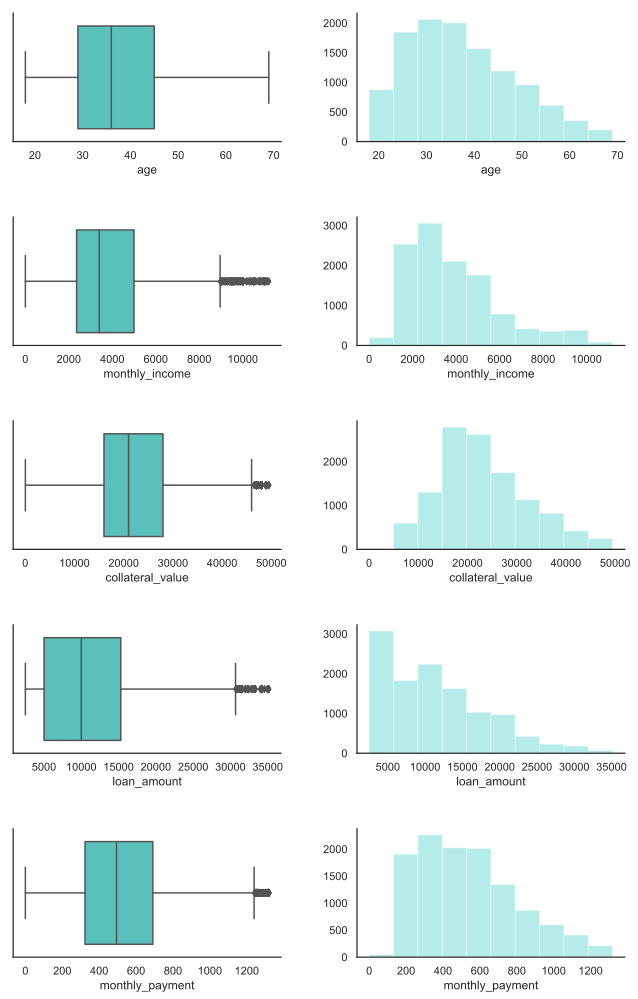

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(10, 15))

sns.boxplot(data['age'], color="mediumturquoise", ax=axes[0][0])
sns.distplot(data['age'], bins=10, kde=False, color="mediumturquoise", ax=axes[0][1])

sns.boxplot(data['monthly_income'], color="mediumturquoise", ax=axes[1][0])
sns.distplot(data['monthly_income'], bins=10, kde=False, color="mediumturquoise", ax=axes[1][1])

sns.boxplot(data['collateral_value'], color="mediumturquoise", ax=axes[2][0])
sns.distplot(data['collateral_value'], bins=10, kde=False, color="mediumturquoise", ax=axes[2][1])

sns.boxplot(data['loan_amount'], color="mediumturquoise", ax=axes[3][0])
sns.distplot(data['loan_amount'], bins=10, kde=False, color="mediumturquoise", ax=axes[3][1])

sns.boxplot(data['monthly_payment'], color="mediumturquoise", ax=axes[4][0])
sns.distplot(data['monthly_payment'], bins=10, kde=False, color="mediumturquoise", ax=axes[4][1])

plt.tight_layout(pad=4, w_pad=3, h_pad=3)
sns.despine(left=False, bottom=False)
sns.set(style="white")

<b> Categorical Features </b>

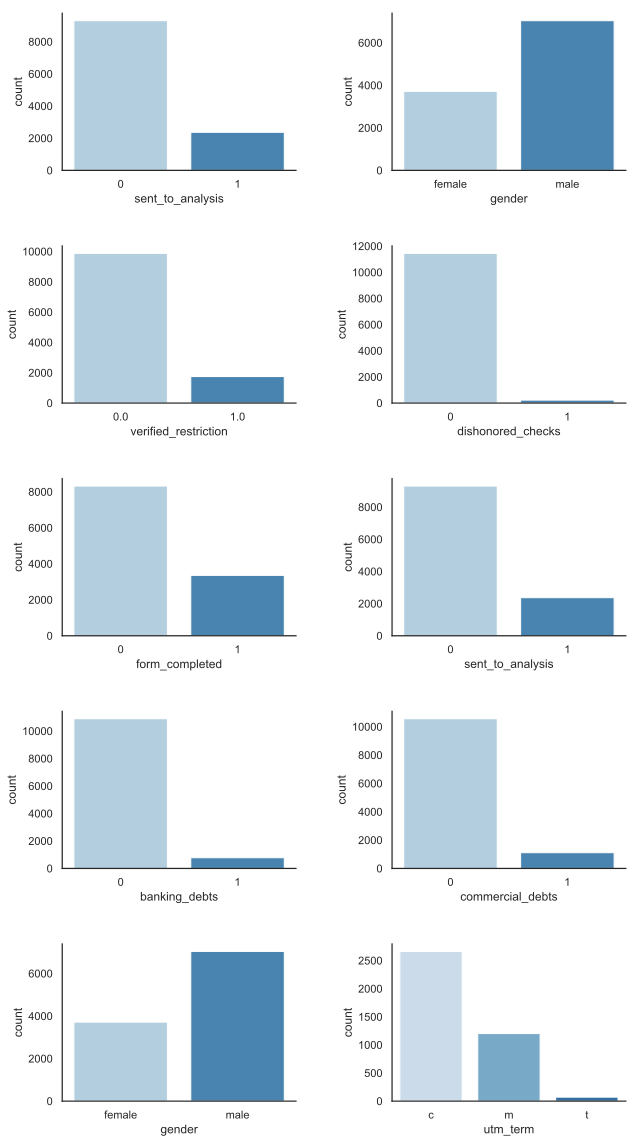

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(10, 17))

sns.countplot(x="sent_to_analysis", data=data, palette='Blues', ax=axes[0][0])
sns.countplot(x="gender", data=data, palette='Blues', ax=axes[0][1])

sns.countplot(x="verified_restriction", data=data, palette='Blues', ax=axes[1][0])
sns.countplot(x="dishonored_checks", data=data, palette='Blues', ax=axes[1][1])

sns.countplot(x="form_completed", data=data, palette='Blues', ax=axes[2][0])
sns.countplot(x="sent_to_analysis", data=data, palette='Blues', ax=axes[2][1])

sns.countplot(x="banking_debts", data=data, palette='Blues', ax=axes[3][0])
sns.countplot(x="commercial_debts", data=data, palette='Blues', ax=axes[3][1])

sns.countplot(x="gender", data=data, palette='Blues', ax=axes[4][0])
sns.countplot(x="utm_term", data=data, palette='Blues', ax=axes[4][1])

plt.tight_layout(pad=4, w_pad=3, h_pad=3)
sns.despine(left=False, bottom=False)
sns.set(style="white")

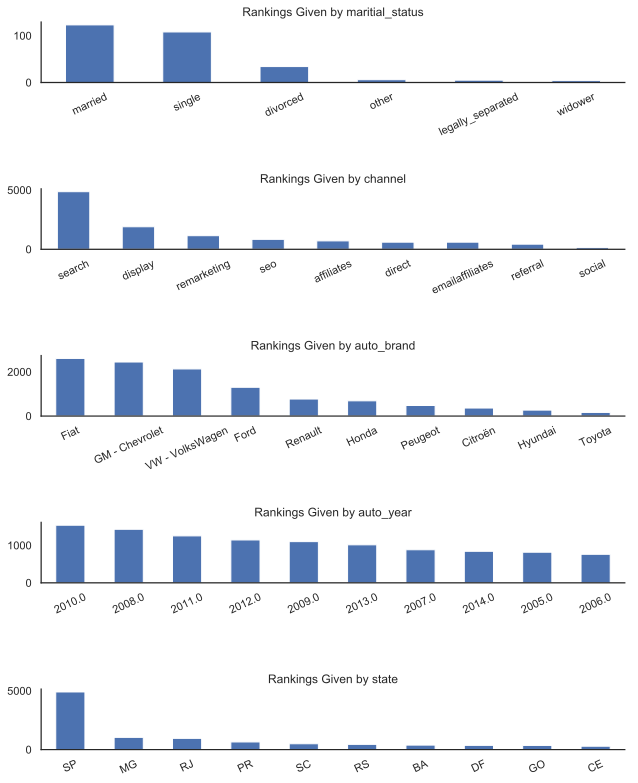

In [15]:
fig, axes = plt.subplots(5, 1, figsize=(10, 12))

data['marital_status'].value_counts().head(10).plot.bar(ax=axes[0], rot=25, title='Rankings Given by maritial_status')
data['channel'].value_counts().head(10).plot.bar(ax=axes[1], rot=25, title='Rankings Given by channel')
data['auto_brand'].value_counts().head(10).plot.bar(ax=axes[2], rot=25, title='Rankings Given by auto_brand')
data['auto_year'].value_counts().head(10).plot.bar(ax=axes[3], rot=25, title='Rankings Given by auto_year')
data['state'].value_counts().head(10).plot.bar(ax=axes[4], rot=25, title='Rankings Given by state')

plt.tight_layout(pad=4, w_pad=3, h_pad=3)
sns.despine(left=False, bottom=False)
sns.set(style="white")

### Multivariate Visualization

Now that we get a first look into our features we can start to see the relationship between two and more different features to get to know your correlations and get some output from it.

<b> 'sent_to_analysis' vs. Quantitative <b>

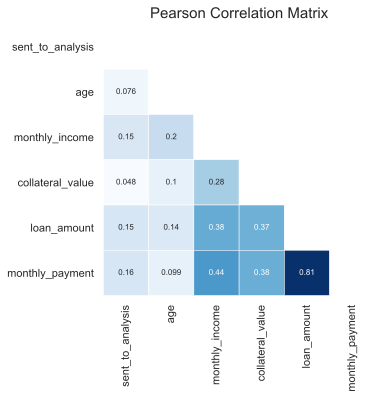

In [16]:
features = ['sent_to_analysis', 'age', 'monthly_income', 'collateral_value', 'loan_amount', 'monthly_payment']

mask = np.zeros_like(data[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5,5))
plt.title('Pearson Correlation Matrix', fontsize = 15)

sns.heatmap(data[features].corr(),
            mask=mask,
            annot=True,
            linewidths=.5,
            vmax=0.7,
            square=True,
            cmap="Blues",
            linecolor="w",
            annot_kws={"size":8},
            cbar_kws={"shrink": .9},
            cbar=False)

In [19]:
numeric_features = ['age', 'monthly_income', 'collateral_value', 'loan_amount', 'monthly_payment']
column_name = data[numeric_features].columns

scaled_data = StandardScaler().fit_transform(data[numeric_features])
scaled_data = pd.DataFrame(scaled_data, columns=column_name)

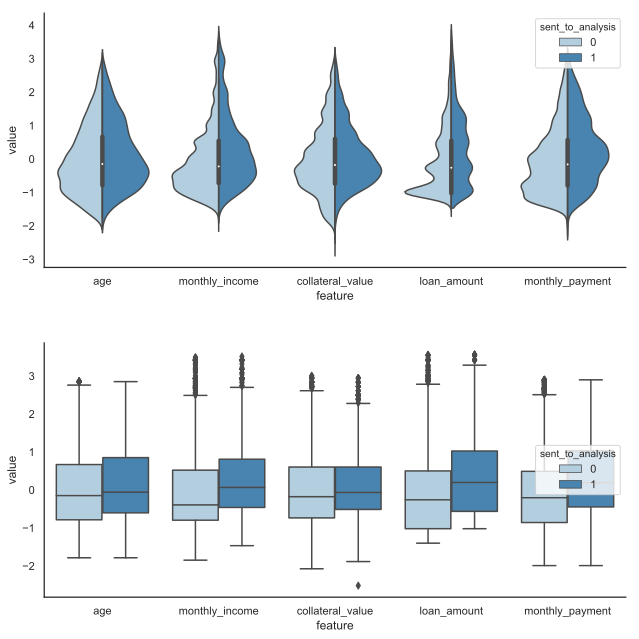

In [20]:
features = pd.concat([data[['sent_to_analysis']], scaled_data[numeric_features]], axis=1)
features = pd.melt(features, id_vars='sent_to_analysis', var_name='feature', value_name='value')

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.violinplot(x='feature', y='value', data=features, hue='sent_to_analysis', split=True, palette='Blues', ax=axes[0])
sns.boxplot(x='feature', y='value', data=features, hue='sent_to_analysis', palette='Blues', ax=axes[1])

plt.tight_layout(pad=4, w_pad=3, h_pad=3)
sns.despine(left=False, bottom=False)
sns.set(style="white")

<b> 'sent_to_analysis' vs Categorical</b>

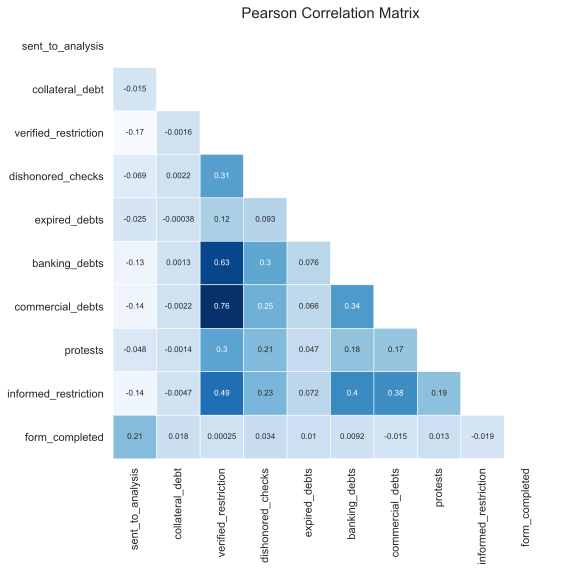

In [22]:
features = ['sent_to_analysis', 'collateral_debt', 'verified_restriction', 'dishonored_checks', 'expired_debts', 'banking_debts',
           'commercial_debts', 'protests', 'informed_restriction', 'form_completed', 'gender']

mask = np.zeros_like(data[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8,8))
plt.title('Pearson Correlation Matrix', fontsize = 15)

sns.heatmap(data[features].corr(),
            mask=mask,
            annot=True,
            linewidths=.5,
            vmax=0.7,
            square=True,
            cmap="Blues",
            linecolor="w",
            annot_kws={"size":8},
            cbar_kws={"shrink": .9},
            cbar=False)

In [68]:
data.groupby(['state'])['sent_to_analysis'].agg([np.mean]).sort_values(by='mean', ascending=False).head()

,mean
state,
AP,0.272727
ES,0.266187
PR,0.230415
RS,0.230248
SP,0.218048


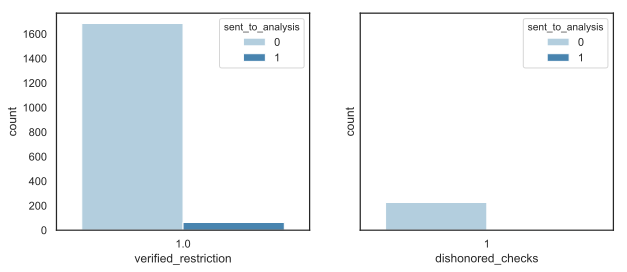

In [23]:
verified_restriction = data[data['verified_restriction'] == 1] 
categorical_features = data[data['dishonored_checks'] == 1] 

_,axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='verified_restriction', hue='sent_to_analysis', data=verified_restriction, ax=axes[0], palette='Blues');
sns.countplot(x='dishonored_checks', hue='sent_to_analysis', data=categorical_features, ax=axes[1], palette='Blues');

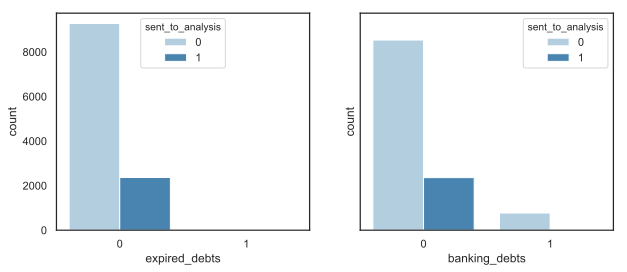

In [24]:
_,axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='expired_debts', hue='sent_to_analysis', data=data, ax=axes[0], palette='Blues');
sns.countplot(x='banking_debts', hue='sent_to_analysis', data=data, ax=axes[1], palette='Blues');